In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


(10841, 13)

In [5]:
def missing_value_of_data(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=round(total/df.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])


missing_value_of_data(df)

,Total,Percentage
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,3,0.03
Content Rating,1,0.01
Type,1,0.01
Last Updated,0,0.00
Genres,0,0.00
Price,0,0.00
Installs,0,0.00
Size,0,0.00


Each column will be explored individually.
1. [App](#app)
2. [Category](#cat)
3. [Rating](#rating)
4. [Reviews](#reviews)
5. [Type](#type)
6. [Size](#size)
7. [Installs](#installs)
8. [Content Rating](#content_rating)
9. [Genres](#genres)
10. [Current Version](#current_version)
11. [Android Version](#android_version)

# <a id=app>App</a>

In [6]:
df["App"].nunique()

9660

In [7]:
df["App"].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
8 Ball Pool                                          7
Candy Crush Saga                                     7
                                                    ..
Home & Shopping - Only in apps. 10% off + 10% off    1
Door Lock Screen                                     1
Car G-Force Meter                                    1
Learn English from Persian: Persian to English       1
F-Sim Space Shuttle                                  1
Name: App, Length: 9660, dtype: int64

In [8]:
df[df["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [9]:
df.drop_duplicates(subset = "App", inplace = True)

In [10]:
df["App"].value_counts()

All Language Translator           1
Best Applock - Locker & No Ads    1
Teeny Titans - Teen Titans Go!    1
Video Player All Format           1
CG Yojna & Jansampark             1
                                 ..
Soccer Clubs Logo Quiz            1
T-Mobile DIGITS                   1
Event Manager - AllEvents.in      1
Rush                              1
F-Sim Space Shuttle               1
Name: App, Length: 9660, dtype: int64

In [11]:
df.shape

(9660, 13)

# <a id=cat>Category</a>

In [12]:
df["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Obviously, one of the cells contains an unexpected category which is "1.9".

In [13]:
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So, data in this row is not correct, I change it below.

In [14]:
df.at[10472, "Category"] = "PHOTOGRAPHY"
df.at[10472, "Installs"] = "1,000,000+"
df.at[10472, "Price"] = "0"
df.at[10472, "Last Updated"] = "July 20, 2018"
df.at[10472, "Current Ver"] = "1.0.19"
df.at[10472, "Android Ver"] = "4.0 and up"

In [15]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,19.0,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [16]:
df["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             282
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

# <a id=rating>Rating</a>

In [17]:
df["Rating"].value_counts()

4.3     897
4.4     895
4.5     848
4.2     810
4.6     683
4.1     621
4.0     513
4.7     442
3.9     359
3.8     286
5.0     271
3.7     224
4.8     221
3.6     167
3.5     156
3.4     126
3.3     100
4.9      85
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
19.0      1
Name: Rating, dtype: int64

In [18]:
df[df["Rating"] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,19.0,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [19]:
average_rating = df["Rating"].mean()
df.at[10472, "Rating"] = round(average_rating, 1)

In [20]:
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [21]:
df[df.columns[1]][1]

'ART_AND_DESIGN'

In [22]:
df["Rating"].isnull().sum()

1463

In [23]:
df.loc[df["Category"] == "PHOTOGRAPHY"]["Rating"]

2801     4.1
2802     4.6
2803     4.8
2804     4.0
2805     4.7
        ... 
10666    4.6
10707    4.5
10716    4.2
10726    4.4
10740    4.3
Name: Rating, Length: 282, dtype: float64

In [24]:
df["Rating"] = df.groupby("Category").transform(lambda x: x.fillna(round(x.mean(),1)))

In [25]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [26]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            9660 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null object
Type              9659 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9658 non-null object
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


# <a id=reviews>Reviews</a>

In [28]:
df["Reviews"].value_counts()

0         593
1         272
2         213
3         170
4         137
         ... 
28429       1
459851      1
3654        1
330         1
1699        1
Name: Reviews, Length: 5331, dtype: int64

# <a id=type>Type</a>

In [29]:
df["Type"].value_counts()

Free    8902
Paid     756
0          1
Name: Type, dtype: int64

In [30]:
df.loc[df["Type"] == "0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [31]:
df.at[10472, "Type"] = "Free"
df["Type"].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [32]:
df["Type"].isnull().sum()

1

Let's find the nan, now. Then, change it to "Free", becuase most of the apps are free.

In [33]:
df[df["Type"].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [34]:
df.at[9148, "Type"] = "Free"

In [35]:
df["Type"].isnull().sum()

0

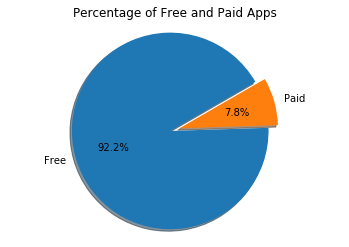

In [36]:
labels = df["Type"].value_counts().index
sizes = df["Type"].value_counts()
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Free and Paid Apps")
plt.show()

# <a id=size>Size</a>

In [37]:
df["Size"].value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
220k                     1
514k                     1
39k                      1
89k                      1
430k                     1
Name: Size, Length: 462, dtype: int64

In [38]:
df["Size"].isnull().sum()

0

In [39]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Size of apps contains prefixes for Kilo and Mega. They should be converted into float and kept in same unit.

In [40]:
def size_convert(i):
    if "M" in i:
        return float(i[:-1]) * 1000
    elif "K" in i:
        return float(i[:-1])
    else:
        return i
df["Size"] = df["Size"].apply(size_convert)

In [41]:
df["Size"]

0                     19000
1                     14000
2                      8700
3                     25000
4                      2800
                ...        
10836                 53000
10837                  3600
10838                  9500
10839    Varies with device
10840                 19000
Name: Size, Length: 9660, dtype: object

# <a id=installs>Installs</a>

In [42]:
df["Installs"].isnull().sum()

0

In [43]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Values in string format, so they should be converted into integers. Thus, "+" and "," should be removed first, then convert into integers.

In [44]:
df["Installs"] = df["Installs"].apply(lambda x: x.replace(',',''))
df["Installs"] = df["Installs"].apply(lambda x: x.replace('+',''))
df["Installs"] = df["Installs"].apply(lambda x: int(x))

In [45]:
df.loc[df["Installs"] == 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [46]:
sorted_value = sorted(list(df["Installs"].unique()))
df["Installs"].replace(sorted_value,range(0,len(sorted_value),1), inplace = True )

Text(0.5, 1.0, 'Rating vs Installs')

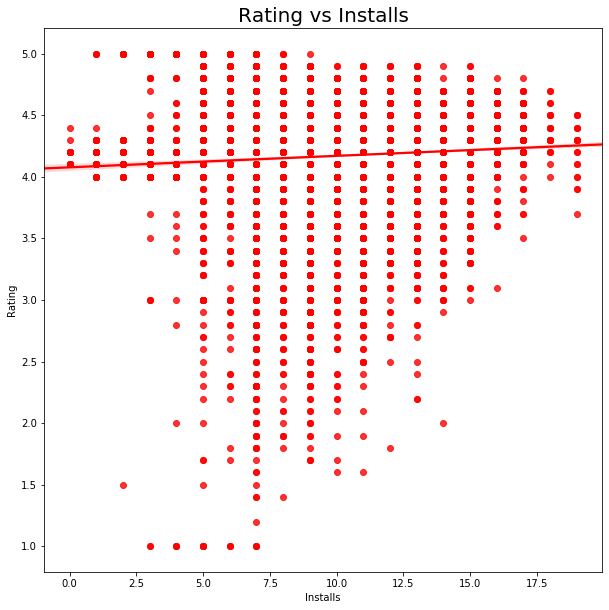

In [47]:
plt.figure(figsize = (10,10))
sns.regplot(x = "Installs", y = "Rating", color = 'r',data=df);
plt.title('Rating vs Installs',size = 20)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            9660 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null int64
Type              9660 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9658 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


# <a id=content_rating>Content Rating</a>

In [49]:
df["Content Rating"].isnull().sum()

1

In [50]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [51]:
df[df["Content Rating"].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+",13,Free,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [52]:
df.at[10472, "Content Rating"] = "Everyone"

In [53]:
df["Content Rating"].isnull().sum()

0

# <a id=genres>Genres</a>

In [54]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [55]:
df.loc[df["Genres"] == "February 11, 2018"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+",13,Free,0,Everyone,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [56]:
df.at[10472, "Genres"] = "Photography"

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            9660 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null int64
Type              9660 non-null object
Price             9660 non-null object
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9658 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


# <a id=current_version>Current Version</a>

In [58]:
df["Current Ver"].nunique()

2817

In [59]:
df["Current Ver"].isnull().sum()

8

In [60]:
df["Current Ver"].fillna("1.0", inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            9660 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null int64
Type              9660 non-null object
Price             9660 non-null object
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9660 non-null object
Android Ver       9658 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


# <a id=android_version>Android Version</a>

In [62]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [63]:
df["Android Ver"].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1286
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
4.1 - 7.1.1              1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In order to have a clean result, 
all data should be like "4.0 and up",
instead of this.
***
4.0.3 - 7.1.1            2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
***


In [64]:
def and_version(i):
    if str(i) == "4.4W and up":
        return "4.4 and up"
    elif "-" in str(i):
        return str(i.split(" ")[0]) + " and up"
    else:
        return i

df["Android Ver"] = df["Android Ver"].apply(and_version)

In [65]:
df["Android Ver"].value_counts()

4.1 and up            2203
4.0.3 and up          1397
4.0 and up            1286
Varies with device     990
4.4 and up             829
2.3 and up             616
5.0 and up             516
4.2 and up             372
2.3.3 and up           273
2.2 and up             240
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              43
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
Name: Android Ver, dtype: int64

In [66]:
df.loc[df["Android Ver"].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000,7,Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100,9,Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [67]:
df.at[10472, "Price"] = "0"
df.at[10472, "Last Updated"] = "July 20, 2018"
df.at[10472, "Current Ver"] = "1.0.19"
df.at[10472, "Android Ver"] = "4.0 and up"
df["Android Ver"].fillna("4.0 and up", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            9660 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null int64
Type              9660 non-null object
Price             9660 non-null object
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9660 non-null object
Android Ver       9660 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB
